In [69]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [70]:
def collect(path, version):
    with open(path) as f:
        for line in f:
            record = json.loads(line)
            record['version'] = version
            yield record
            
ba12 = list(collect('data/ba_perf.12.3.json', '1.4.12.3'))
ba13 = list(collect('data/ba_perf.13.1.json', '1.4.13.1'))
len(ba12)

1749

In [71]:
from pandas.io.json import json_normalize
ba12_data = json_normalize(ba12)
ba13_data = json_normalize(ba13)
all = pd.concat([ba12_data, ba13_data], axis=0)
len(all)

3487

In [72]:
all

,_id,app,browser,cell,code,createdAt.$date,dataset,events,extra.app,extra.browser,...,extra.type,extra.url,isNew,language,requestId,totalDuration,type,url,username,version
0,25etKLpJ9NXu2f8QC,NaN,NaN,NaN,NaN,1459899650820,NaN,"[{u'timestamp': 1459899688878, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/9psW9orjam7aTP5M...,NaN,NaN,NaN,65,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
1,26QPGtmP5WDEmTZZf,NaN,NaN,NaN,NaN,1459902221078,NaN,"[{u'timestamp': 1459902265289, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/RtQedEwEPJPKEAyQ...,NaN,NaN,NaN,9,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
2,283CwXouLQKYKRwaY,NaN,NaN,NaN,NaN,1459899803674,NaN,"[{u'timestamp': 1459899841390, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/9psW9orjam7aTP5M...,NaN,NaN,NaN,381,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
3,2G67eBchcLX4ZoKek,NaN,NaN,NaN,NaN,1459899630265,NaN,"[{u'timestamp': 1459899668302, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/9psW9orjam7aTP5M...,NaN,NaN,NaN,84,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
4,2GEGhsKFjmbgLjdCY,NaN,NaN,NaN,NaN,1459901916020,NaN,"[{u'timestamp': 1459901960221, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/ZHZWbwJEPb7KxLZf...,NaN,NaN,NaN,14,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
5,2GWMte34payxnDgdy,NaN,NaN,NaN,NaN,1459902556003,NaN,"[{u'timestamp': 1459902600205, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/HGYyv8H6JTZLBY3e...,NaN,NaN,NaN,21,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
6,2GZJE2KjJ4sxsbrno,NaN,NaN,NaN,NaN,1459899255724,NaN,"[{u'timestamp': 1459899293818, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://172.31.6.14/narratives/9zdyFSFibw7ceSrq...,NaN,NaN,NaN,64,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12.3
7,2Hw8d3DaoaxqfmkPp,NaN,NaN,NaN,NaN,1459901854786,NaN,"[{u'timestamp': 1459901898987, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/ZHZWbwJEPb7KxLZf...,NaN,NaN,NaN,13,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
8,2KG3BwFNMGbbYfkKW,NaN,NaN,NaN,NaN,1459899377969,NaN,"[{u'timestamp': 1459899416119, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://172.31.6.14/narratives/JzFp8WBhBPEphHsD...,NaN,NaN,NaN,8,sq-autosuggest,NaN,testbot@adatao.com,1.4.12.3
9,2LEM5oYu9CT5SfuoA,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,QkheLa3QDFm8mXDL6-c569a1c3-3d6a-46f3-9c09-ceba...,what is the min of avgdailysteps,1459902798011,activity20,"[{u'timestamp': 1459902841383, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,0ae163b4-a603-4cce-acc1-514d5a85137d,854,cell-execution,http://172.31.6.14/narratives/QkheLa3QDFm8mXDL...,NaN,1.4.12.3


In [73]:
cell_exec = all[(all['type'] == 'cell-execution')
                & (all['extra.numFilters'] == 0)
                & np.logical_not(all['url'].str.contains('dashboard'))]
cell_exec

,_id,app,browser,cell,code,createdAt.$date,dataset,events,extra.app,extra.browser,...,extra.type,extra.url,isNew,language,requestId,totalDuration,type,url,username,version
9,2LEM5oYu9CT5SfuoA,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,QkheLa3QDFm8mXDL6-c569a1c3-3d6a-46f3-9c09-ceba...,what is the min of avgdailysteps,1459902798011,activity20,"[{u'timestamp': 1459902841383, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,0ae163b4-a603-4cce-acc1-514d5a85137d,854,cell-execution,http://172.31.6.14/narratives/QkheLa3QDFm8mXDL...,NaN,1.4.12.3
15,2dBEnZo4iKA3RrQxs,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,RtQedEwEPJPKEAyQ7-d9d1e6ae-81dd-4cf0-a335-6c65...,show annual avgdailysteps by firstsynctime,1459902165198,activity20,"[{u'timestamp': 1459902208468, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,80ebb1a1-5d44-4a2f-8690-21f84c19b692,949,cell-execution,http://172.31.6.14/narratives/RtQedEwEPJPKEAyQ...,NaN,1.4.12.3
18,2pwBNBqPML3qbhg6E,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,9zdyFSFibw7ceSrqq-701a3ad5-ffb1-430a-99bc-c5fb...,forecast number_of_rows in the next 60 days of...,1459899099118,activity20,"[{u'timestamp': 1459899134456, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,a1d348ea-e146-40b2-92b6-d2848f6c792b,2820,cell-execution,http://172.31.6.14/narratives/9zdyFSFibw7ceSrq...,NaN,1.4.12.3
20,2tgiFNMx8Dpuz39Bn,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,JzFp8WBhBPEphHsDA-ba4cda86-2572-40fe-948d-8353...,show annual numsleepsessions by lastsynctime,1459899504589,activity20,"[{u'timestamp': 1459899541485, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,3f6704e6-9bd5-47b2-bf54-b33d2eb7dd92,1264,cell-execution,http://172.31.6.14/narratives/JzFp8WBhBPEphHsD...,NaN,1.4.12.3
33,3GwHdQqu3FziSP3mr,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,JzFp8WBhBPEphHsDA-0971d0fb-34ca-48f5-9fc3-e1fe...,plot density heatmap of activedays by sex and ...,1459899302923,activity20,"[{u'timestamp': 1459899339516, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,0ac369dd-7e16-4baa-90ae-38865cd22612,1564,cell-execution,http://172.31.6.14/narratives/JzFp8WBhBPEphHsD...,NaN,1.4.12.3
46,3e7wpGBMrBEQQNeoD,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,JzFp8WBhBPEphHsDA-a3ad6090-4d11-4b6e-85c1-06be...,show annual avgdailypoints by dob,1459899393930,activity20,"[{u'timestamp': 1459899431087, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,7d15dceb-bb58-4df5-b7ba-d751551ef137,1000,cell-execution,http://172.31.6.14/narratives/JzFp8WBhBPEphHsD...,NaN,1.4.12.3
58,4Da8XmNhxcAgnhBb4,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,RtQedEwEPJPKEAyQ7-5c93849c-6521-4312-9937-bbeb...,plot density heatmap of avgdailypoints by firs...,1459902055178,activity20,"[{u'timestamp': 1459902098611, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,f0faa848-6fba-46fe-b370-033fa524bd7b,785,cell-execution,http://172.31.6.14/narratives/RtQedEwEPJPKEAyQ...,NaN,1.4.12.3
62,4RPM9iFfzfsGhT7q4,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,KtKAdsaeSKq6mmSzv-015629de-1c53-4124-953a-3118...,show value of number_of_rows,1459900039204,activity20,"[{u'timestamp': 1459900076301, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,dd516d08-0e88-4cae-8827-8e3fa5b3fc96,1075,cell-execution,http://172.31.6.14/narratives/KtKAdsaeSKq6mmSz...,NaN,1.4.12.3
64,4TSEKmeEaSRGjMKdz,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,9zdyFSFibw7ceSrqq-a79e43c9-d1ca-48a4-806e-36f0...,describe sex,1459899018755,activity20,"[{u'timestamp': 1459899056695, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,59273f9a-70a7-46e7-a664-94bcbda3dc5f,219,cell-execution,http://172.31.6.14/narratives/9zdyFSFibw7ceSrq...,NaN,1.4.12.3
70,4eBEt7tYKacqRdwA3,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,9zdyFSFibw7ceSrqq-b62794ee-b33a-4b1f-9a18-4a3e...,forecast numsleepsessions in the next 90 days ...,1459899164422,activity20,"[{u'timestamp': 1459899200272, u'event': u'cel...",NaN,N

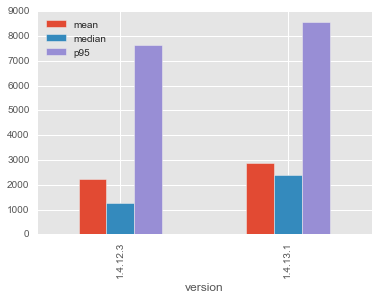

In [74]:
def p95(arr):
    return np.percentile(arr, 95)

cell_exec.groupby('version').agg([np.mean, np.median, p95])['totalDuration'].plot.bar()

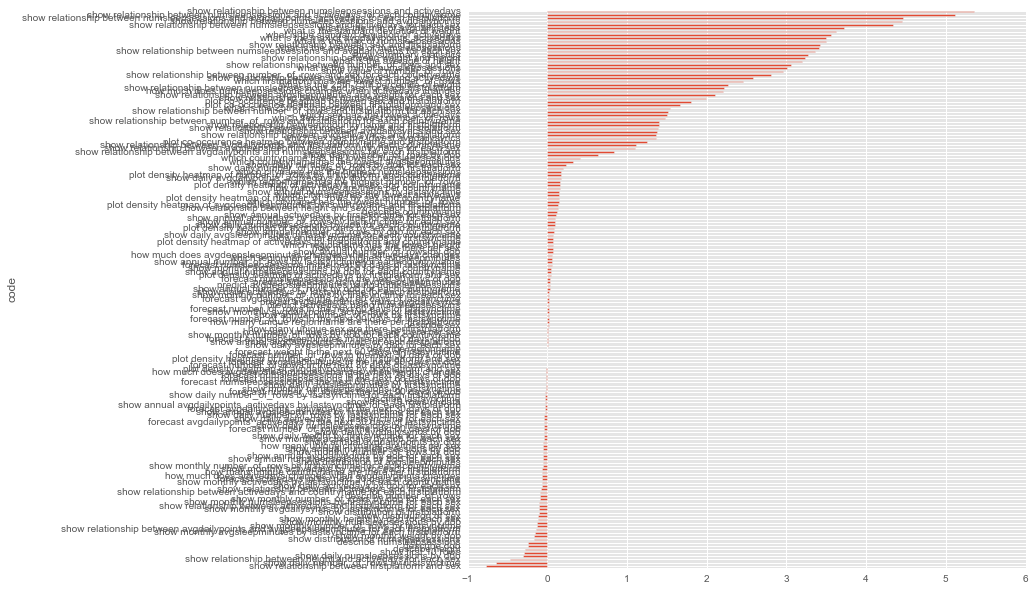

In [75]:
v12_mean = cell_exec[cell_exec['version'] == '1.4.12.3'].groupby('code').agg({'totalDuration': np.mean})
v13_mean = cell_exec[cell_exec['version'] == '1.4.13.1'].groupby('code').agg({'totalDuration': np.mean})

mean_diff = (v13_mean['totalDuration'] - v12_mean['totalDuration']) / v12_mean['totalDuration']
plt.figure(figsize=(10,10))
mean_diff.sort_values().plot.barh()

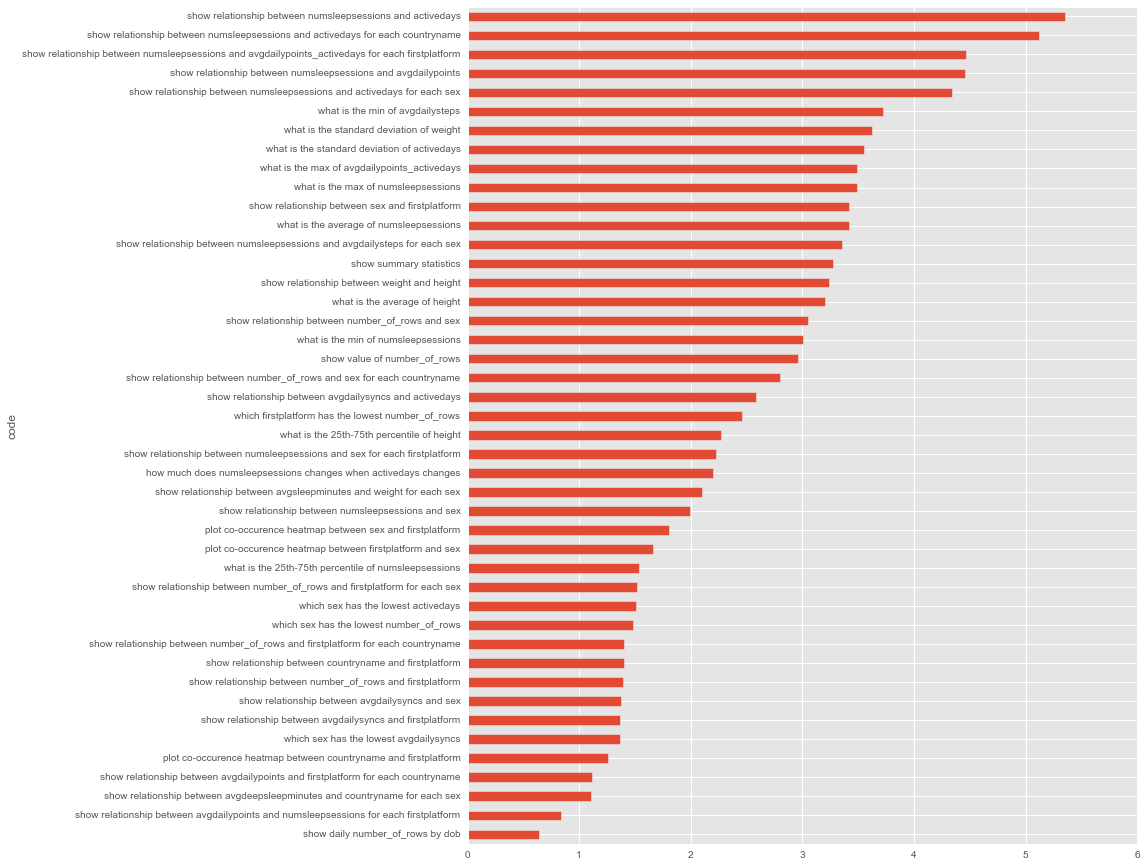

In [76]:
plt.figure(figsize=(12,15))
mean_diff[mean_diff > 0.5].sort_values().plot.barh()

In [86]:
cell_exec[cell_exec.code == 'what is the average of height'][['version', 'totalDuration']]

,version,totalDuration
637,1.4.12.3,908
1379,1.4.12.3,950
801,1.4.13.1,3836
1138,1.4.13.1,3968


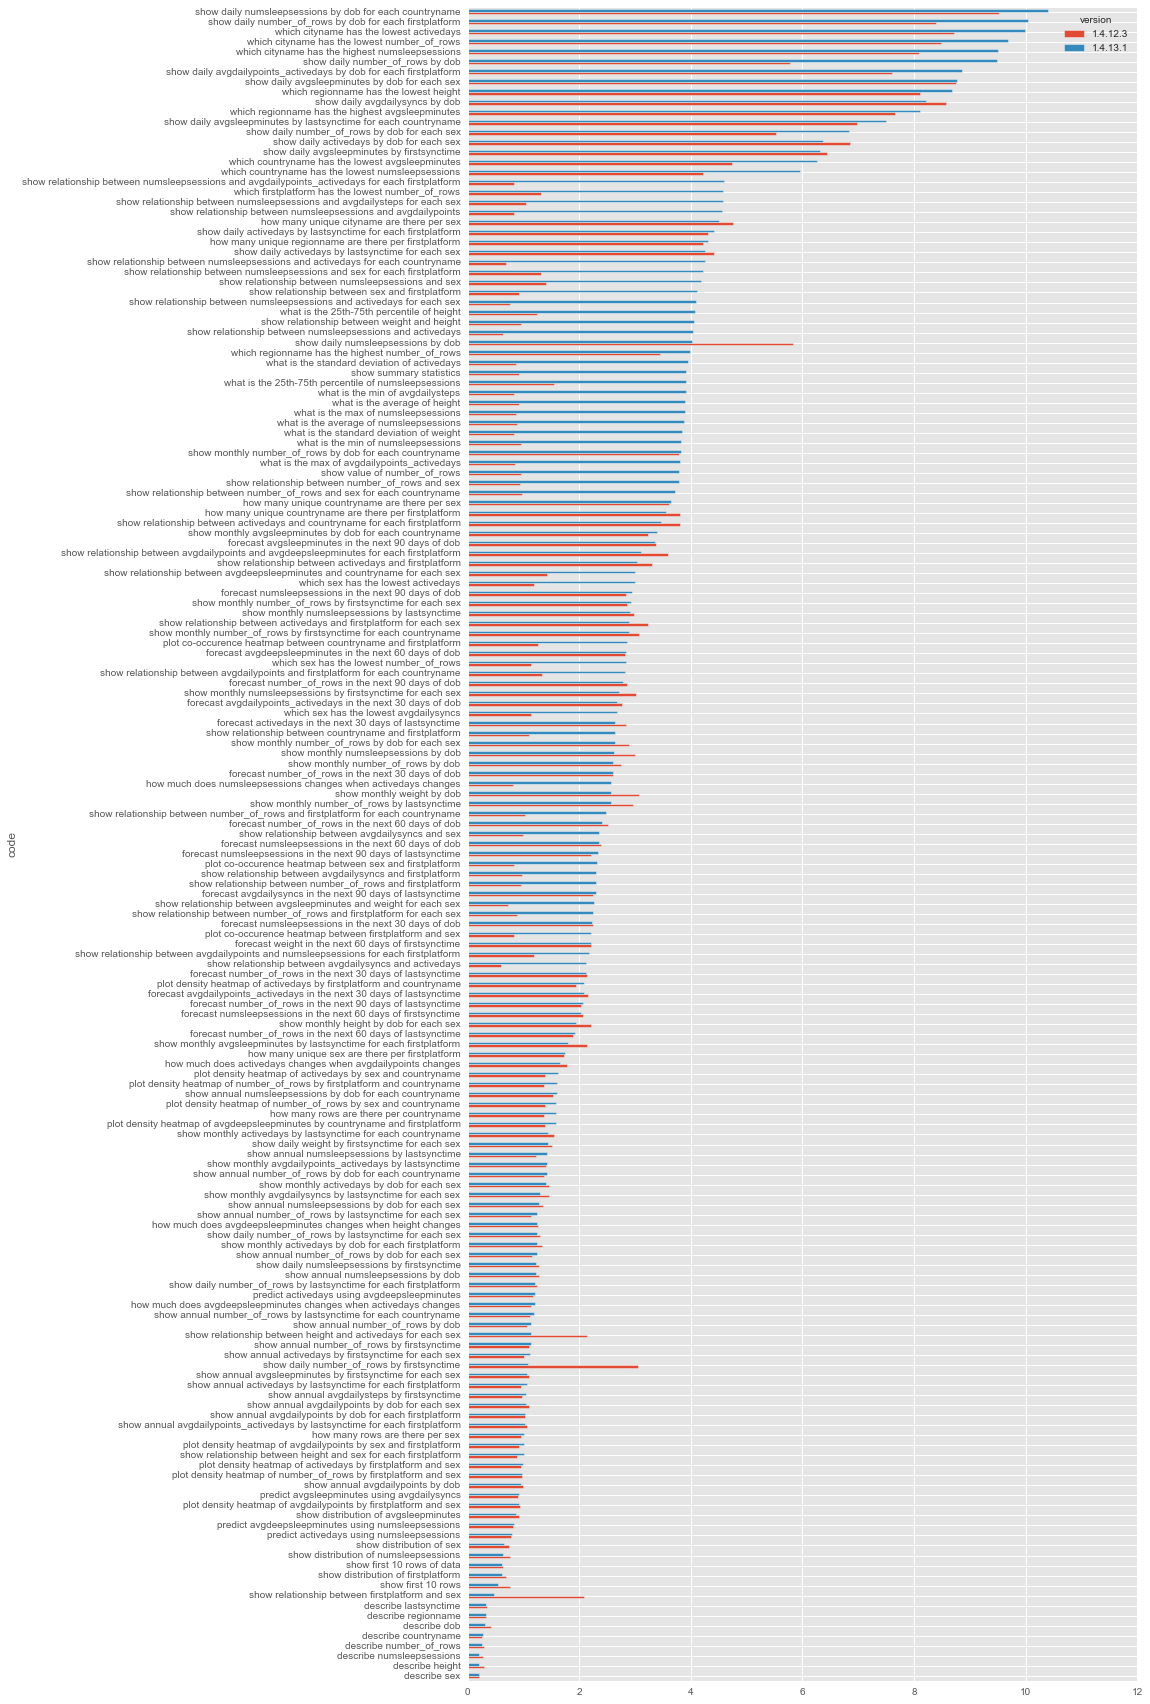

In [81]:
grp = cell_exec.groupby(['version', 'code'])[['totalDuration']].mean() / 1000
grp.unstack('version')['totalDuration'].sort_values('1.4.13.1').plot.barh(figsize=(12,30))

In [82]:
nrt_sq_exec_df = cell_exec[['code', 'dataset', 'totalDuration', 'version']]
nrt_sq_exec_df

,code,dataset,totalDuration,version
9,what is the min of avgdailysteps,activity20,854,1.4.12.3
15,show annual avgdailysteps by firstsynctime,activity20,949,1.4.12.3
18,forecast number_of_rows in the next 60 days of...,activity20,2820,1.4.12.3
20,show annual numsleepsessions by lastsynctime,activity20,1264,1.4.12.3
33,plot density heatmap of activedays by sex and ...,activity20,1564,1.4.12.3
46,show annual avgdailypoints by dob,activity20,1000,1.4.12.3
58,plot density heatmap of avgdailypoints by firs...,activity20,785,1.4.12.3
62,show value of number_of_rows,activity20,1075,1.4.12.3
64,describe sex,activity20,219,1.4.12.3
70,forecast numsleepsessions in the next 90 days ...,activity20,2308,1.4.12.3


In [84]:
nrt_sq_exec_df.to_pickle('data/telemetry.nrt.sq.exec.pkl')